# TestCase 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 1
# testcase : 1
# version : 2
# error_estimations : {'param_num': 1}
# gains : {'n_params': 100}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
if version == 1:
    from testcases.networks.test_1D.test_1.test_1_v1 import Run_laplacian1D,Poisson_1D
elif version == 2:
    from testcases.networks.test_1D.test_1.test_1_v2 import Run_laplacian1D,Poisson_1D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_1D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
/home/u2/lecourtier/Article1/code
torch loaded; device is cpu


Training PINN
>> load network /home/u2/lecourtier/Article1/code/networks/test_1D/test_fe1_v2.pth
network loaded
Error  tensor([0.0057])


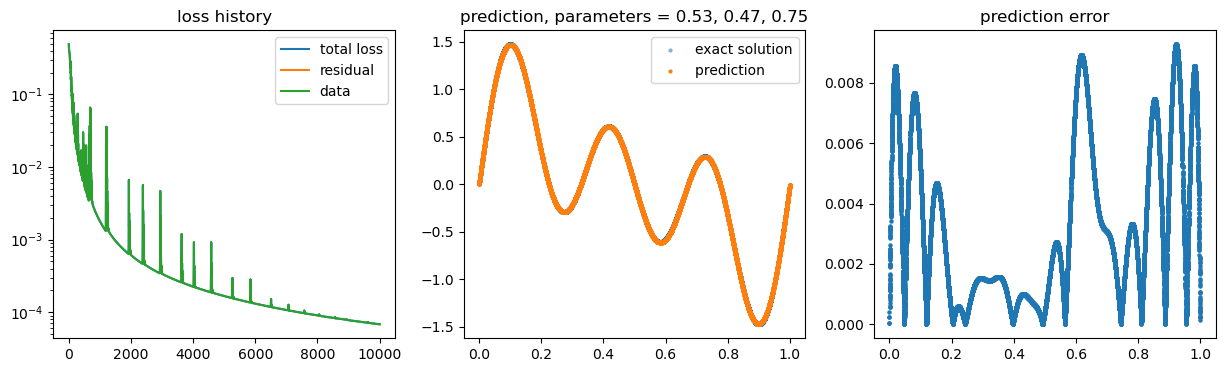

In [9]:
pde = Poisson_1D()
trainer,u_theta = Run_laplacian1D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir, tab_degree=[1])
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/FEM_case1_v2_param1_degree1.csv


In [13]:
# error_estimations.run_fem_alldeg(new_run=False,plot_cvg=False)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/Corr_case1_v2_param1_degree1.csv


In [15]:
# error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=False)

### Run Mult

In [16]:
tab_M = [3.0,100.0]

In [17]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/Mult_case1_v2_param1_degree1_M3.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/Mult_case1_v2_param1_degree1_M100.0.csv


In [18]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=False)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/Mult_case1_v2_param1_degree1_M3.0.csv
Mult weak P1 M3.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/cvg/param1/Mult_case1_v2_param1_degree1_M100.0.csv
Mult weak P1 M100.0 not found


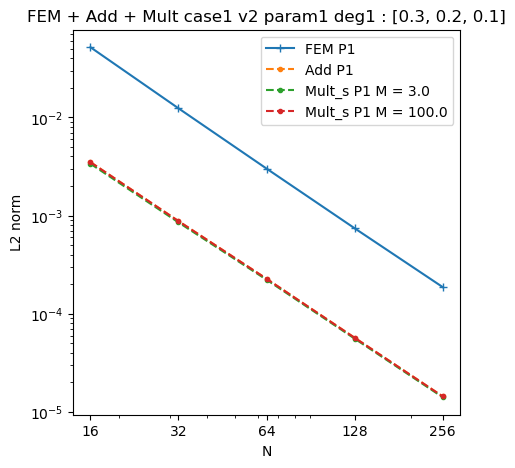

In [19]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [20]:
compare_methods.save_tab_alldeg_allM(tab_M)

Mult weak P1 M3.0 not found
Mult weak P1 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [ ]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [22]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir, tab_degree=[1])
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/gains/
3


### Run FEM

In [23]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Run errrors with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [24]:
# gains_enhanced_fem.run_fem_alldeg(new_run=False)

### Run PINNs

In [25]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Run errrors with PINNs for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [26]:
# gains_enhanced_fem.run_pinns_alldeg(new_run=False)

### Run Add

In [27]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [28]:
# gains_enhanced_fem.run_corr_alldeg(new_run=False)

### Run Mult

In [ ]:
tab_M = [0.0]

Strong :

In [36]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/gains/Mult_errors_case1_v2_degree1_M3.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/gains/Mult_errors_case1_v2_degree1_M100.0.csv


In [31]:
# gains_enhanced_fem.run_mult_alldeg_allM(tab_M,new_run=False)

### Compare methods

In [ ]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree,tab_M)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv
Mult weak P1 M3.0 not found
Mult weak P1 M100.0 not found


In [34]:
# compare_gains_methods.create_dataframes_alldeg_allM(tab_M)

In [35]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase1/version2/gains/FEM_errors_case1_v2_degree1.csv
Mult weak P1 M3.0 not found
Mult weak P1 M100.0 not found
method           PINNs                       FEM                     
type               min    max   mean   std   min    max   mean    std
method    n_vert                                                     
Corr      20      1.34  10.95   3.33  2.09  6.91  60.85  26.12  12.45
          40      4.35  34.37  11.19  6.97  7.13  39.34  20.55   7.94
Mult3.0   20      0.85  10.40   2.56  1.98  3.54  53.99  19.66  11.11
          40      2.64  35.30   8.68  6.98  2.18  39.06  15.66   8.25
Mult100.0 20      1.35  10.96   3.33  2.09  6.90  60.73  26.11  12.43
          40      4.35  34.41  11.19  6.97  7.13  39.38  20.55   7.93


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:252: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
